<a href="https://colab.research.google.com/github/yeahginny/Data-Analysis-School/blob/main/0831_NetworkX_%EB%AC%BC%EB%A5%98%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
factories = pd.read_csv("https://raw.githubusercontent.com/wikibook/pyda100/master/6%EC%9E%A5/tbl_factory.csv")
factories
warehouses = pd.read_csv("https://raw.githubusercontent.com/wikibook/pyda100/master/6%EC%9E%A5/tbl_warehouse.csv")
warehouses
cost = pd.read_csv("https://raw.githubusercontent.com/wikibook/pyda100/master/6%EC%9E%A5/rel_cost.csv")
cost
trans = pd.read_csv("https://raw.githubusercontent.com/wikibook/pyda100/master/6%EC%9E%A5/tbl_transaction.csv")
trans

,TRID,TransactionDate,ToFC,FromWH,Quantity
0,0,2019-01-01 02:11:10,FC00004,WH00003,33
1,1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2,2019-01-01 06:32:32,FC00006,WH00004,31
3,3,2019-01-01 07:17:06,FC00002,WH00003,18
4,4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34


In [6]:
# trans와 cost를 결합
# 운송실적 테이블에 각 테이블을 조인
# 비용 데이터추가
join_data = pd.merge(trans, cost, left_on=["ToFC","FromWH"], right_on=["FCID","WHID"], how="left")
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8


In [7]:
# 공장정보 추가
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID_x,WHID,Cost,FCID_y,FCName,FCDemand,FCRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,FC00004,대전공장,25,북부
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,FC00007,부산공장,25,남부
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,FC00006,광주공장,30,남부
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,FC00002,수원공장,29,북부
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,FC00001,서울공장,28,북부


In [10]:
# 북부 데이터 추출
north = join_data.loc[join_data["FCRegion"]=="북부"]
north.head()

# 남부 데이터 추출
south = join_data.loc[join_data["FCRegion"]=="남부"]
south.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID_x,WHID,Cost,FCID_y,FCName,FCDemand,FCRegion
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,FC00007,부산공장,25,남부
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,FC00006,광주공장,30,남부
5,5,2019-01-01 08:56:09,FC00005,WH00005,31,14,FC00005,WH00005,0.3,FC00005,대구공장,21,남부
6,6,2019-01-01 09:00:15,FC00006,WH00006,33,18,FC00006,WH00006,0.7,FC00006,광주공장,30,남부
9,9,2019-01-01 14:12:51,FC00006,WH00006,21,18,FC00006,WH00006,0.7,FC00006,광주공장,30,남부


In [11]:
# 지사의 비용합계 계산
print(f"북부지사 총비용: {north['Cost'].sum()}만원")
print(f"남부지사 총비용: {south['Cost'].sum()}만원")

북부지사 총비용: 2189.3만원
남부지사 총비용: 2062.0만원


In [12]:
tmp = (north["Cost"].sum() / north["Quantity"].sum()) * 10000
print(f"북부지사의 부품 1개당 운송 비용: {int(tmp)}원")
tmp = (south["Cost"].sum() / south["Quantity"].sum()) * 10000
print(f"남부지사의 부품 1개당 운송 비용: {int(tmp)}원")

북부지사의 부품 1개당 운송 비용: 445원
남부지사의 부품 1개당 운송 비용: 410원


In [13]:
# 평균운송비용
print(f"북부지사의 평균 운송 비용：{north['Cost'].mean()}원")
print(f"남부지사의 평균 운송 비용：{south['Cost'].mean()}원")

북부지사의 평균 운송 비용：1.0946500000000001원
남부지사의 평균 운송 비용：1.031원


### 물류 최적화 네트워크

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
# 그래프 객체생성
G=nx.Graph()

In [16]:
# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

In [17]:
# 엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")

In [18]:
# 좌표 설정
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

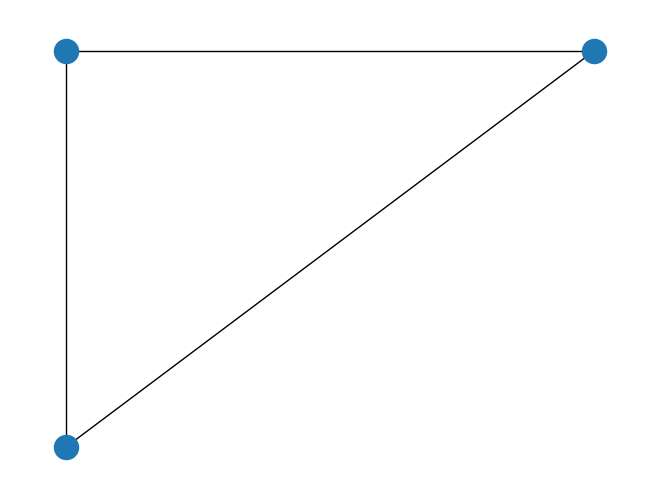

In [19]:
# 그리기
nx.draw(G,pos)

# 표시
plt.show()

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
# 그래프 객체 생성．
G=nx.Graph()

In [22]:
# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

In [23]:
# 엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")
G.add_edge("nodeA","nodeD")

In [24]:
# 좌표 설정
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)
pos["nodeD"]=(1,0)

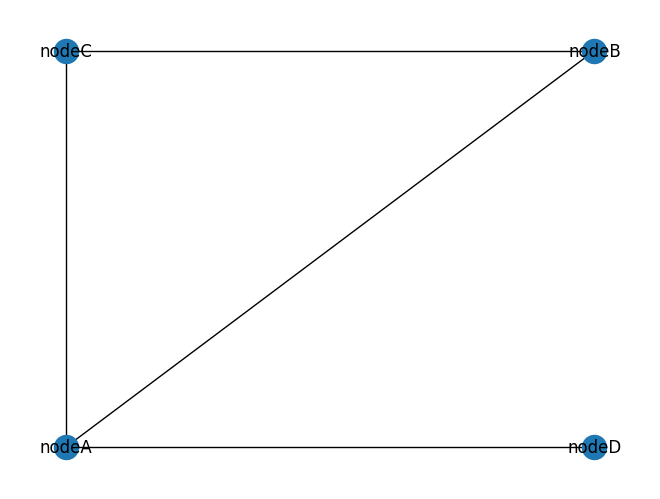

In [25]:
# 그리기
nx.draw(G,pos, with_labels=True)

# 표시
plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 저장된 가중치 데이터 불러오기
df_w = pd.read_csv('https://raw.githubusercontent.com/wikibook/pyda100/master/6%EC%9E%A5/network_weight.csv')
df_p = pd.read_csv('https://raw.githubusercontent.com/wikibook/pyda100/master/6%EC%9E%A5/network_pos.csv')

In [27]:
df_w
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [28]:
# 그래프 객체 생성
G = nx.Graph()

In [29]:
# 노드 설정
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

In [30]:
# 엣지 설정 & 가중치 리스트화
size = 10
edge_weights = []
num_pre = 0

In [31]:
# 엣지 가중치 확인용 번역자 추가 코드
name = ['A','B','C','D','E']

In [32]:
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        if not (i==j):
            # 엣지 추가
            G.add_edge(df_w.columns[i],df_w.columns[j])
            if num_pre<len(G.edges):
                num_pre = len(G.edges)
                # 엣지 가중치 추가
                edge_weights.append(df_w.iloc[i][j]*size)

                # 엣지 가중치 확인용 번역자 추가 코드
                print(f'({name[i]}, {name[j]}) = {np.round(edge_weights[-1],5)}')

(A, B) = 1.43353
(A, C) = 9.44669
(A, D) = 5.21848
(A, E) = 0.0
(B, C) = 4.5615
(B, D) = 5.68434
(B, E) = 0.0
(C, D) = 9.43748
(C, E) = 0.0
(D, E) = 6.66767


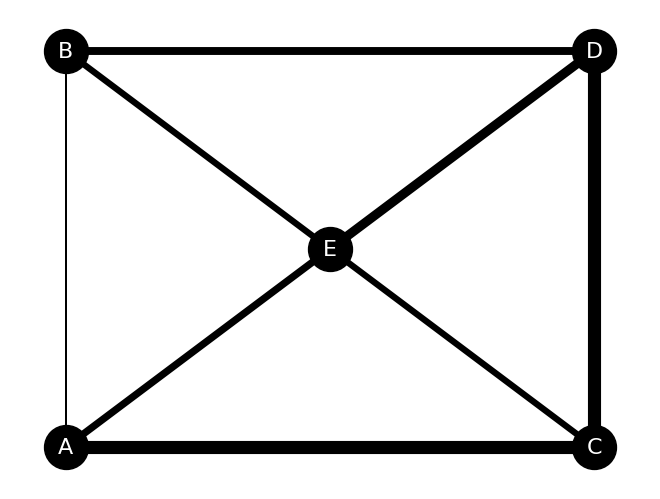

In [33]:
# 좌표 설정
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0],df_p[node][1])

# 그리기
nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color='k', font_color='w', width=edge_weights)

# 표시
plt.show()